<a href="https://colab.research.google.com/github/huunghia160799/DevC-Innovation-Challenge-Homework-Set/blob/master/Assignment_3_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

In [0]:
# Your code here
import pandas as pd
import seaborn as sns

**Import data**

In [0]:
link = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
# Note: set param encoding = 'latin1'
# Your code here
df = pd.read_csv(link, encoding = 'latin1')

In [27]:
# Print out First 5 rows from dataframe
# Your code here
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [28]:
# Print out brief info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

**Examine few examples of NaN values**

In [29]:
# List all NaN values
df[df.isnull().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/10 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/10 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/10 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/10 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/10 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/10 14:32,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,12/1/10 14:32,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,12/1/10 14:32,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,12/1/10 14:32,0.43,NaN,United Kingdom


In [0]:
# Remove row with NaN
df = df.dropna()

**Exclude negative Quatity entries**

In [31]:
# Make a mask to remove any row with a negative value
mask = (df['Quantity'] < 0)
df = df[~mask]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


**Exclude negative Price entries**

In [32]:
# Make a mask to remove any row with a negative value
mask = df['UnitPrice'] < 0
df = df[~mask]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

In [74]:
# Get user coming from UK
df_uk = df[df['Country'] == 'United Kingdom'].reset_index(drop=True)
# Get the user with the highest number of orders
highest = df_uk.iloc[df_uk['Quantity'].idxmax()]
highest

InvoiceNo                           581483
StockCode                            23843
Description    PAPER CRAFT , LITTLE BIRDIE
Quantity                             80995
InvoiceDate                   12/9/11 9:15
UnitPrice                             2.08
CustomerID                           16446
Country                     United Kingdom
Name: 353987, dtype: object

**The customer with the highest money spent on purchases comes from Netherlands**

In [76]:
# Get users coming from the Netherlands
df_ned = df[df['Country'] == 'Netherlands'].reset_index(drop=True)
df_ned
# Get the user with the highest spending
maxSpent, maxIdx = -1, -1
for idx, row in df_ned.iterrows():
    curSpent = row['Quantity'] * row['UnitPrice']
    if curSpent > maxSpent:
        maxSpent = curSpent
        maxIdx = idx
highest = df_ned.iloc[maxIdx]
highest

InvoiceNo                  573003
StockCode                   23084
Description    RABBIT NIGHT LIGHT
Quantity                     2400
InvoiceDate        10/27/11 12:11
UnitPrice                    2.08
CustomerID                  14646
Country               Netherlands
Name: 2049, dtype: object

**On which year had the highest sales?**

In [83]:
import re

# function using Regex to extract the year from the string
def getYearFromString(date):
    regex = r"(?<=\/)\d{0,1}\d(?=\s)"
    return int(re.search(regex, date)[0]) + 2000

print(getYearFromString('10/27/11 12:11')

2011


In [84]:
# Augment the data with a "Year" column
df['Year'] = df['InvoiceDate'].apply(getYearFromString)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,2010
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,2010


In [85]:
# group the data by 'Year' and then get the sum of each year
df_groupby_year = df.groupby('Year').sum()
df_groupby_year.head()
# We can see that the year with the best sales is 2011

,Quantity,UnitPrice,CustomerID
Year,,,
2010,312280,8.193561e+04,4.062410e+08
2011,4869416,1.158065e+06,5.679734e+09


**How many orders (per hour)?**

In [89]:
import re

# function using Regex to extract the hour from the string
def getHourFromString(date):
    regex = r"(?<=\s)\d{0,1}\d"
    return int(re.search(regex, date)[0])

print(getHourFromString('10/27/11 12:11'))

12


In [91]:
df['Hour'] = df['InvoiceDate'].apply(getHourFromString)
# the number of unique hour
df.nunique()

InvoiceNo      18536
StockCode       3665
Description     3877
Quantity         302
InvoiceDate    17286
UnitPrice        441
CustomerID      4339
Country           37
Year               2
Hour              15
dtype: int64

In [104]:
df_groupby_hour_mean = df.groupby('Hour').mean()
df_groupby_hour_mean.reset_index(inplace=True)
# group the data by hour and get the mean
# then get the value of column 'Quantity'
df_groupby_hour_mean['Quantity']

0      1.000000
1     40.554090
2     18.210217
3     21.979039
4     20.420590
5     13.219730
6     11.450499
7     10.664210
8     10.321078
9     12.190690
10    10.545885
11     9.913403
12    18.782178
13     9.838651
14    11.953865
Name: Quantity, dtype: float64

In [105]:
df_groupby_hour_mean.head()

,Hour,Quantity,UnitPrice,CustomerID,Year
0,6,1.000000,4.250000,14305.000000,2011.000000
1,7,40.554090,4.032375,14253.659631,2010.973615
2,8,18.210217,3.347252,14789.903809,2010.976297
3,9,21.979039,3.381603,14846.122716,2010.950832
4,10,20.420590,3.172119,15177.059554,2010.936709


**Make a plot about number of orders per hour**

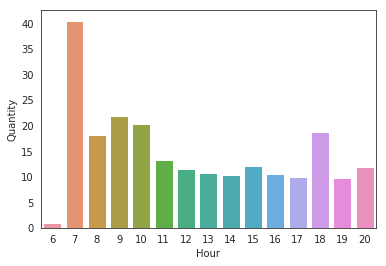

In [111]:
sns.set_style("white")
sns.barplot(x='Hour', y='Quantity', data=df_groupby_hour_mean)

**How many orders (per month)?**

In [116]:
# function using Regex to extract the month from the string
def getMonthFromString(date):
    regex = r"^\d+"
    return int(re.search(regex, date)[0])

df['Month'] = df['InvoiceDate'].apply(getMonthFromString)

df_groupby_month_mean = df.groupby('Month').mean()
df_groupby_month_mean.reset_index(inplace=True)
# group the data by month and get the mean
# then get the value of column 'Quantity'
df_groupby_month_mean[['Month', 'Quantity']]

,Month,Quantity
0,1,16.444376
1,2,13.329888
2,3,12.824962
3,4,12.905185
4,5,13.194160
5,6,13.378665
6,7,13.770902
7,8,14.768371
8,9,13.612266
9,10,11.984341


**Make a plot about number of orders per month**

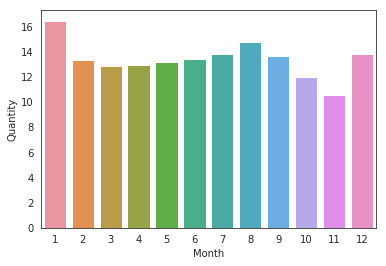

In [117]:
sns.barplot(x="Month", y="Quantity", data=df_groupby_month_mean)

**Top 10 items most sales**

In [124]:
# First group the data by 'StockCode'
# Then count the number of occurrences
# Then sort the data by 'Quantity' in a descending order 
df_sales = df.groupby('StockCode').sum().sort_values(by='Quantity', ascending=False).reset_index()
df_sales.head(10)

,StockCode,Quantity,UnitPrice,CustomerID,Year,Hour,Month
0,23843,80995,2.08,16446.0,2011,9,12
1,23166,77916,241.62,3047321.0,398178,2542,1603
2,84077,54415,138.40,7226036.0,951174,5876,3625
3,22197,49183,896.36,16490386.0,2147669,13479,8442
4,85099B,46181,3261.69,24748363.0,3253714,20026,11781
5,85123A,36782,5887.47,31667793.0,4092178,25700,14147
6,84879,35362,2366.56,21450268.0,2831394,17754,10275
7,21212,33693,585.49,16135698.0,2147673,13379,7235
8,23084,27202,1695.74,12564016.0,1693262,10739,8343
9,22492,26076,213.37,4780324.0,653549,3913,2343


**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

Country
Netherlands    200937
EIRE           140525
Germany        119263
France         111472
Australia       84209
Sweden          36083
Switzerland     30083
Spain           27951
Japan           26016
Belgium         23237
Name: Quantity, dtype: int64


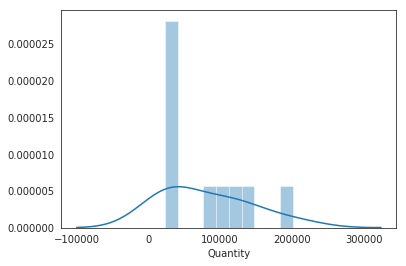

In [134]:
# get a descending list of country sales based on Sum of Quantity
df_sales_country = df.groupby('Country').sum().sort_values(by='Quantity', ascending=False)
# Remove United Kingdom
# df_sales_country = df_sales_country[df_sales_country['Country'] != 'United Kingdom']
df_sales_country = df_sales_country.drop('United Kingdom')
# Get the top 10 country
top_10 = df_sales_country.head(10)['Quantity']
print(top_10)
sns.distplot(top_10, bins=10)

### You are awesome!!